In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot

In [12]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [13]:
x = sampleData1[:, 0]
y = sampleData1[:, 1]

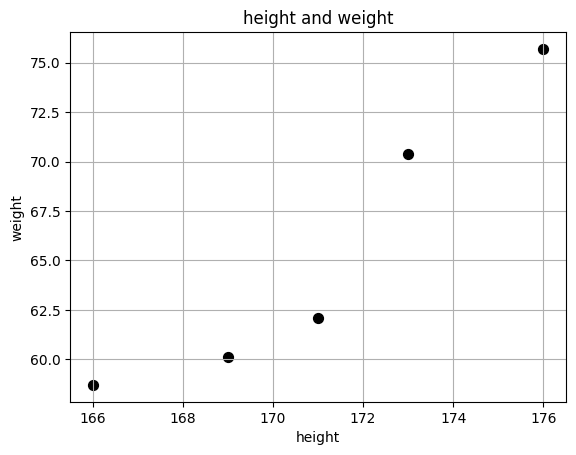

In [7]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height and weight')
plt.grid()
plt.show()

In [14]:
X = x - x.mean()
Y = y - y.mean()

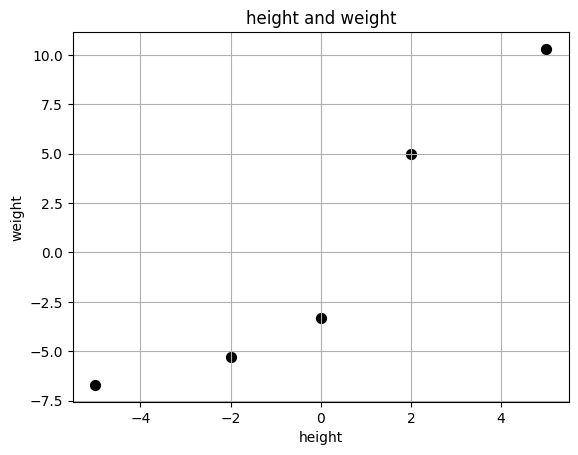

In [9]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('height')
plt.ylabel('weight')
plt.title('height and weight')
plt.grid()
plt.show()

In [15]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [16]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [17]:
def pred(X):
    return W * X + B

In [18]:
Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [ ]:
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

In [19]:
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

In [20]:
loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


In [21]:
loss.backward()

In [22]:
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [23]:
lr = 0.001

In [24]:
with torch.no_grad():
    W -= lr*W.grad
    B -= lr*B.grad

    W.grad.zero_()
    B.grad.zero_()

In [25]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [27]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

In [30]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()

    with torch.no_grad():
        W -= lr*W.grad
        B -= lr*B.grad

        W.grad.zero_()
        B.grad.zero_()

    if (epoch%10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} loss = {loss:.4f}")

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [35]:
print('W =', W.data.numpy())
print('B =', B.data.numpy())

print(f"{history[0, 1]:.4f}")
print(f"{history[-1, 1]:.4f}")

W = 1.820683
B = 0.3675114
13.3520
4.6796


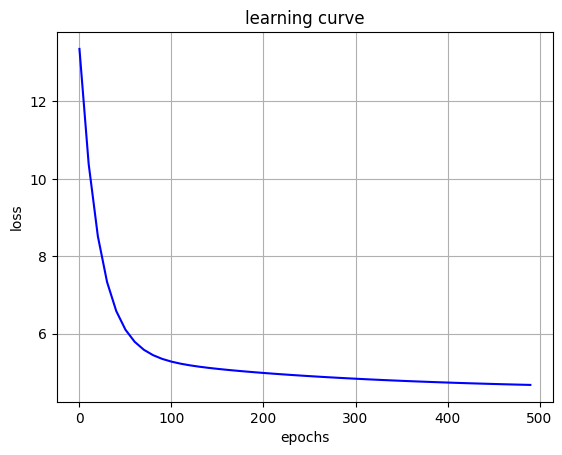

In [36]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('learning curve')
plt.grid()
plt.show()

In [53]:
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


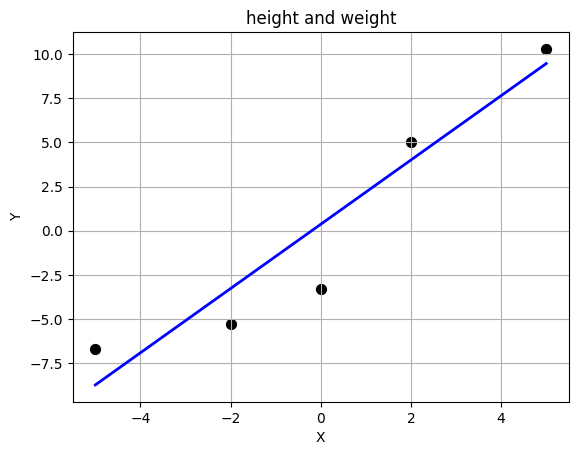

In [54]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('height and weight')
plt.grid()
plt.show()

In [57]:
x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

In [59]:
print(x_range)
print(yp_range)

tensor([166., 176.])
tensor([56.6641, 74.8709], grad_fn=<AddBackward0>)


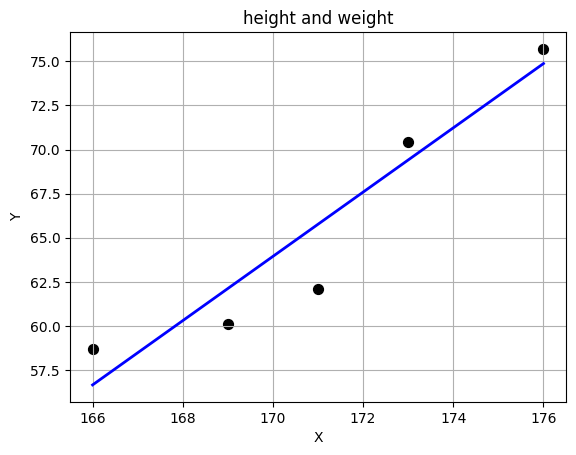

In [60]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_range.data, yp_range.data, lw=2, c='b')
plt.title('height and weight')
plt.grid()
plt.show()

In [68]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

import torch.optim as optim

optimizer = optim.SGD([W, B], lr=lr)
history = np.zeros((0, 2))

In [69]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch%10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack([history, item])
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [70]:
print(W.data.numpy())
print(B.data.numpy())
print()
print(f'{history[0, 1]:.4f}')
print(f'{history[-1, 1]:.4f}')

1.820683
0.3675114

13.3520
4.6796


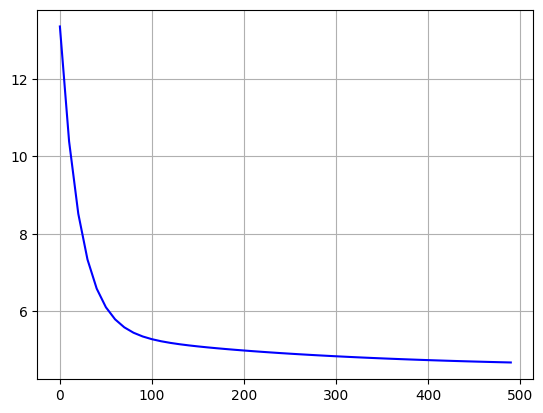

In [64]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.grid()
plt.show()

In [66]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500
lr = 0.001

import torch.optim as optim

optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)
history2 = np.zeros((0, 2))

In [67]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch%10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack([history2, item])
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 5.7585
epoch = 20 loss = 5.9541
epoch = 30 loss = 5.0276
epoch = 40 loss = 4.8578
epoch = 50 loss = 4.7052
epoch = 60 loss = 4.6327
epoch = 70 loss = 4.5940
epoch = 80 loss = 4.5698
epoch = 90 loss = 4.5574
epoch = 100 loss = 4.5495
epoch = 110 loss = 4.5452
epoch = 120 loss = 4.5426
epoch = 130 loss = 4.5411
epoch = 140 loss = 4.5403
epoch = 150 loss = 4.5398
epoch = 160 loss = 4.5395
epoch = 170 loss = 4.5393
epoch = 180 loss = 4.5392
epoch = 190 loss = 4.5391
epoch = 200 loss = 4.5391
epoch = 210 loss = 4.5391
epoch = 220 loss = 4.5391
epoch = 230 loss = 4.5390
epoch = 240 loss = 4.5390
epoch = 250 loss = 4.5390
epoch = 260 loss = 4.5390
epoch = 270 loss = 4.5390
epoch = 280 loss = 4.5390
epoch = 290 loss = 4.5390
epoch = 300 loss = 4.5390
epoch = 310 loss = 4.5390
epoch = 320 loss = 4.5390
epoch = 330 loss = 4.5390
epoch = 340 loss = 4.5390
epoch = 350 loss = 4.5390
epoch = 360 loss = 4.5390
epoch = 370 loss = 4.5390
epoch = 380 loss = 4.5

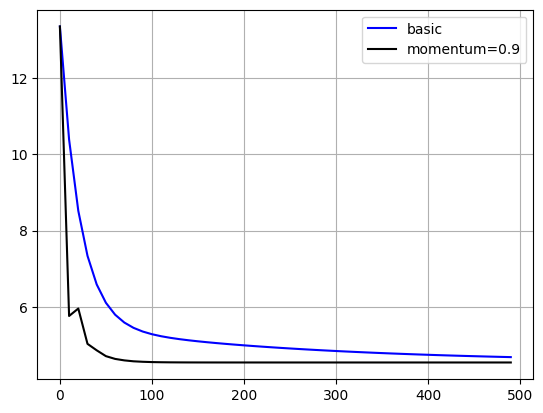

In [71]:
plt.plot(history[:, 0], history[:, 1], 'b', label='basic')
plt.plot(history2[:, 0], history2[:, 1], 'k', label='momentum=0.9')
plt.grid()
plt.legend()
plt.show()

x_ = 320000000.0000 y_ = 1024000000.0000
x_ = 34359738.3680 y_ = 11805916.2072
x_ = 3689348.8147 y_ = 136112.9468
x_ = 396140.8126 y_ = 1569.2754
x_ = 42535.2959 y_ = 18.0925
x_ = 4567.1926 y_ = 0.2086
x_ = 490.3986 y_ = 0.0024
x_ = 52.6561 y_ = 0.0000
x_ = 5.6539 y_ = 0.0000
x_ = 0.6071 y_ = 0.0000


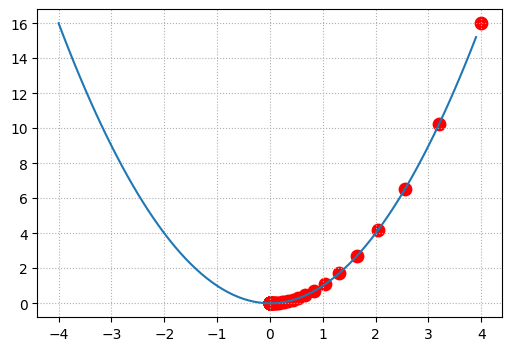

In [94]:
x = np.arange(-4, 4, 0.1)
y = x**2

plt.figure(figsize=(6, 4))
plt.grid(linestyle=":")
plt.plot(x, y)

x_ = 4
y_ = x_**2
lr = 0.1

iter = 100
for epoch in range(iter):
    plt.scatter(x_, y_, s=80, c='r')
    dy_dx = 2*x_

    x_ = x_ - lr*dy_dx
    y_ = x_**2

    if (epoch % 10 == 0):
        print(f'x_ = {x_*100000000:.4f} y_ = {y_*100000000:.4f}')

plt.show()

-6.6710681524760105
x_new = -2.5139 f(x_new) = -6.7227
Local minimum occurs at: -2.2500000050558207


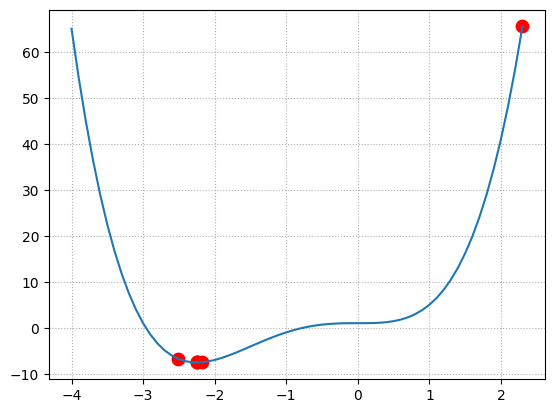

In [135]:
# From calculation, we expect that the local minimum occurs at x=9/4
x_old = 0
x_new = 2.3 # The algorithm starts at x=6
eps = 0.05 # step size
precision = 0.00001
epoch = 0

def f(x):
    return x**4 + 3*x**3 + 1

def f_prime(x):
    return 4 * x**3 + 9 * x**2

while abs(x_new - x_old) > precision:
    if -4 < x_new < 2.4:
        plt.scatter(x_new, f(x_new), s=80, c='r')
    x_old = x_new
    x_new = x_new - eps * f_prime(x_new)
    if (epoch % 100 == 0):
        print(f_prime(x_new))
        print(f'x_new = {x_new:.4f} f(x_new) = {f(x_new):.4f}')
    epoch += 1

print(f"Local minimum occurs at: {x_new}")

x = np.arange(-4, 2.4, 0.1)

plt.plot(x, f(x))
plt.grid(linestyle = ":")
plt.show()